In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
defect_df = pd.read_csv('manufacturing_defect_data.csv')

In [25]:
defect_df.describe()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,548.523148,12423.018476,89.833290,2.558951,2.749116,80.134272,11.476543,2.501373,6.019662,0.050878,90.040115,4.591667,2988.494453,0.299776,5.472098,299.515479,0.840432
std,262.402073,4308.051904,5.759143,1.705804,1.310154,11.611750,6.872684,1.443684,2.329791,0.028797,5.723600,2.896313,1153.420820,0.116400,2.598212,116.379905,0.366261
min,100.000000,5000.174521,80.004820,0.000000,0.500710,60.010098,0.000000,0.001665,2.001611,0.000002,80.004960,0.000000,1000.720156,0.100238,1.000151,100.211138,0.000000
25%,322.000000,8728.829280,84.869219,1.000000,1.598033,70.103420,5.750000,1.264597,3.983249,0.026200,85.180203,2.000000,1988.140274,0.200502,3.228507,194.922058,1.000000
50%,549.000000,12405.204660,89.704861,3.000000,2.708775,80.265312,12.000000,2.465151,6.022389,0.051837,90.125743,5.000000,2996.822302,0.297470,5.437134,299.728918,1.000000
75%,775.250000,16124.462427,94.789936,4.000000,3.904533,90.353822,17.000000,3.774861,8.050222,0.075473,95.050838,7.000000,3984.788299,0.402659,7.741006,403.178283,1.000000
max,999.000000,19993.365550,99.989214,5.000000,4.998529,99.996993,23.000000,4.997591,9.998577,0.099997,99.996786,9.000000,4997.074741,0.499500,9.999749,499.982782,1.000000


In [26]:
defect_df.head()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403780,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046090,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.821000,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


In [27]:
defect_df.isnull().sum()
# no null values to clean out

ProductionVolume        0
ProductionCost          0
SupplierQuality         0
DeliveryDelay           0
DefectRate              0
QualityScore            0
MaintenanceHours        0
DowntimePercentage      0
InventoryTurnover       0
StockoutRate            0
WorkerProductivity      0
SafetyIncidents         0
EnergyConsumption       0
EnergyEfficiency        0
AdditiveProcessTime     0
AdditiveMaterialCost    0
DefectStatus            0
dtype: int64

In [28]:
defect_df.dtypes
# appropriate dtypes for each column

ProductionVolume          int64
ProductionCost          float64
SupplierQuality         float64
DeliveryDelay             int64
DefectRate              float64
QualityScore            float64
MaintenanceHours          int64
DowntimePercentage      float64
InventoryTurnover       float64
StockoutRate            float64
WorkerProductivity      float64
SafetyIncidents           int64
EnergyConsumption       float64
EnergyEfficiency        float64
AdditiveProcessTime     float64
AdditiveMaterialCost    float64
DefectStatus              int64
dtype: object

In [29]:
defect_df['DefectStatus'].value_counts(normalize = True)

DefectStatus
1    0.840432
0    0.159568
Name: proportion, dtype: float64

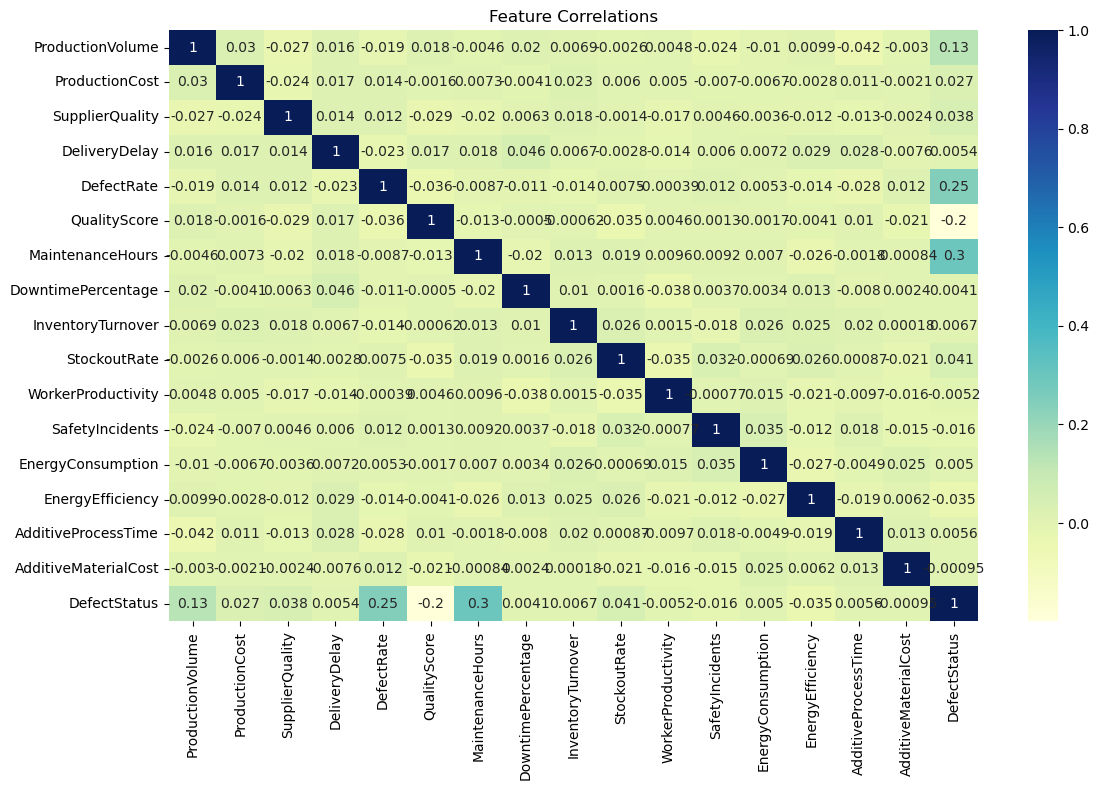

In [30]:
plt.figure(figsize=(12,8))
corr_matrix = defect_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title("Feature Correlations")
plt.tight_layout()
plt.savefig("C:/Users/gadda/Downloads/correlation_matrix.png", dpi=300)
plt.show()

# maintanence hours, production volume, defect rate, and quality score have the most correlation
# with defect status
# maintance hours is the biggest indicator

In [31]:
grouped = defect_df.groupby('DefectStatus').mean().T.sort_values(by=1, ascending=False)
grouped

DefectStatus,0,1
ProductionCost,12158.877326,12473.169403
EnergyConsumption,2975.158109,2991.026547
ProductionVolume,470.866538,563.267352
AdditiveMaterialCost,299.769855,299.467182
WorkerProductivity,90.108731,90.027088
SupplierQuality,89.328686,89.929096
QualityScore,85.442375,79.126454
MaintenanceHours,6.791103,12.366140
InventoryTurnover,5.983667,6.026496
AdditiveProcessTime,5.438599,5.478459


In [32]:
## This table shows diff results than correlation plot
## likely because the data is not standardized so the table is influenced by the scale of each feature

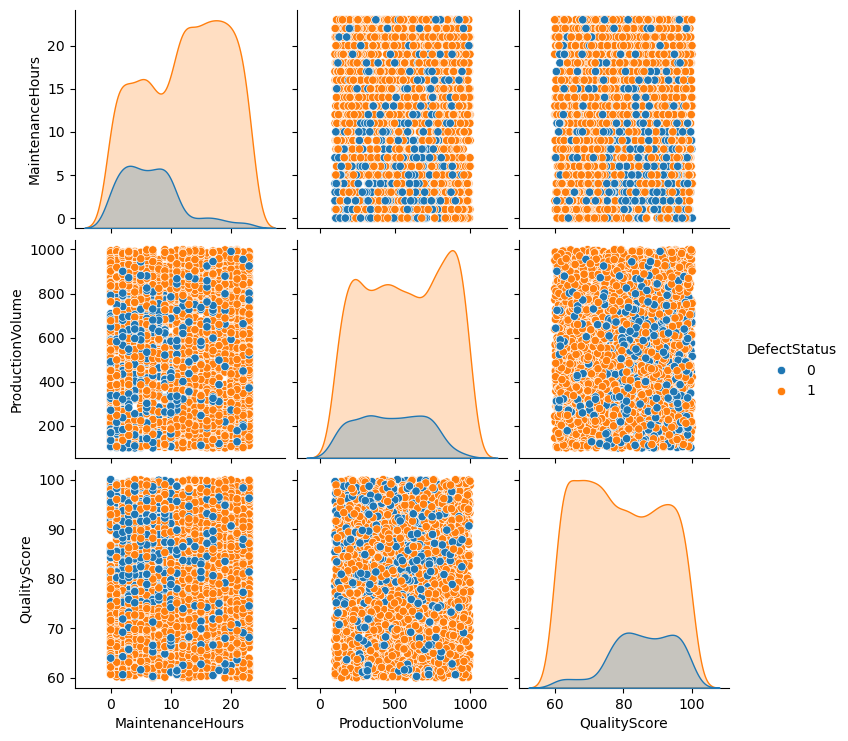

In [33]:
top_features = ['MaintenanceHours', 'ProductionVolume', 'QualityScore']
sns.pairplot(defect_df[top_features + ['DefectStatus']], hue = 'DefectStatus')

In [34]:
## Higher defect rates indicate higher defects (intuitive)
## Distribution for Maintanance Hours is higher with peak around 15-20 hours
## More maintanence hours are associated with lower defect occurances
## Defect Status 1 and maintanence hours is shifted toward lower values (0 to 10)
## fewwer maintanence hours strongly associated with high defects status
## very low maintanence hours is almost exclusivelt associated with high defects
## higher maintanence hours (15+) is associated with low defects
## maintanence hours is strong predictor 
## Productive volume concentrated at lower to moderate volumes (500-600 units)
## higher production volumes => high defect status
## maintanence hours is a critical factor. clear opportunity for process improvement
# in maintanence scheduling and execution

In [35]:
defect_df.drop('DefectRate', axis = 1, inplace=True)

In [36]:
defect_df.head()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403780,86.648534,1,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046090,86.310664,4,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.821000,82.132472,0,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [38]:
X = defect_df.drop('DefectStatus', axis = 1)
y = defect_df['DefectStatus']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [40]:
# scale and standardize data to make model training better
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [43]:
# train the logistic regression model
logmodel = LogisticRegression(class_weight = 'balanced')
logmodel.fit(x_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

In [72]:
# check which features are most important
importance = pd.Series(logmodel.coef_[0], index=X.columns)
importance_sorted = importance.sort_values(key=abs, ascending=False)
importance_sorted

MaintenanceHours        0.973700
QualityScore           -0.661893
ProductionVolume        0.413246
SupplierQuality         0.168288
StockoutRate            0.150593
EnergyEfficiency       -0.106884
ProductionCost          0.069257
DeliveryDelay           0.064427
AdditiveProcessTime     0.061816
SafetyIncidents        -0.036789
DowntimePercentage      0.035074
WorkerProductivity     -0.031585
InventoryTurnover      -0.028909
AdditiveMaterialCost    0.001945
EnergyConsumption       0.000435
dtype: float64

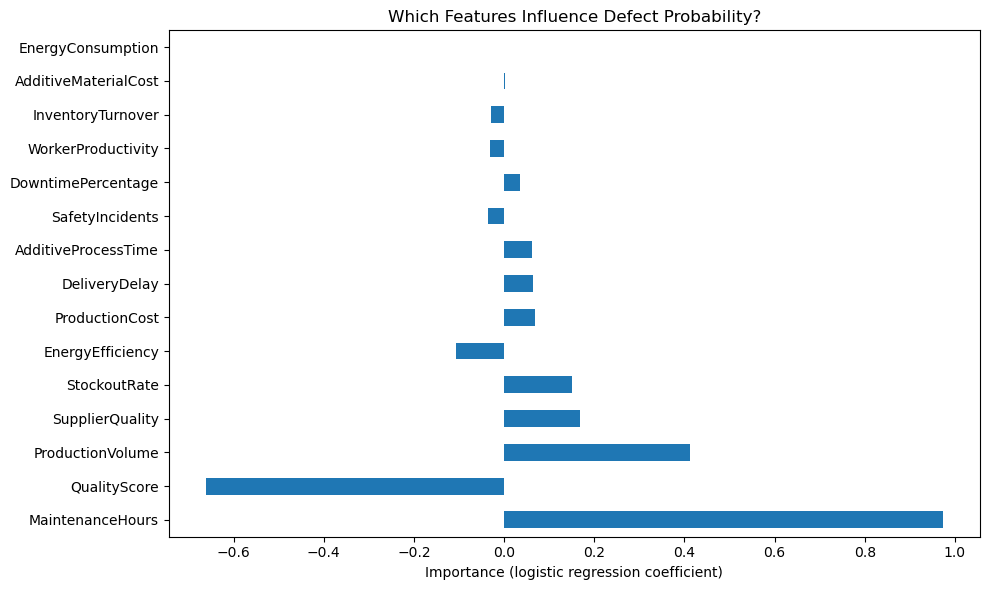

In [45]:
plt.figure(figsize=(10,6))
importance_sorted.plot(kind='barh')
plt.title("Which Features Influence Defect Probability?")
plt.xlabel("Importance (logistic regression coefficient)")
plt.tight_layout()
plt.show()

In [46]:
'''This chart shows us that the most influencial features are:
Maintenance Hours, Quality Score, and Production Volume. 
If maintenance hours go up, defects are more likely and higher quality scores lead to fewer defects
Focus on reducing maintenance hours and increasing quality score. 
Monitor production levels as higher volume may lead to quality control challenges'''

'This chart shows us that the most influencial features are:\nMaintenance Hours, Quality Score, and Production Volume. \nIf maintenance hours go up, defects are more likely and higher quality scores lead to fewer defects\nFocus on reducing maintenance hours and increasing quality score. \nMonitor production levels as higher volume may lead to quality control challenges'

In [47]:
predictions = logmodel.predict(x_test_scaled)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix #evaluate model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.37      0.71      0.49       166
           1       0.93      0.75      0.83       806

    accuracy                           0.74       972
   macro avg       0.65      0.73      0.66       972
weighted avg       0.83      0.74      0.77       972



In [49]:
print(confusion_matrix(y_test, predictions))

[[118  48]
 [202 604]]


In [50]:
'''Initially the logisitic regression model achieved high accuracy (85%) but failed to 
correctly classify non-defective products due to class imbalance
for class 0 (no defect) = 0.16
precision for class 1(defect) = 0.87
To address this, I implemented class_weight = 'balanced' in the model to give more importance
to the minority class. 
After this adjustment, recall for class 0 improved significantly (from 0.16 to 0.79)
precision for class 1 also improved (0.95)'''

"Initially the logisitic regression model achieved high accuracy (85%) but failed to \ncorrectly classify non-defective products due to class imbalance\nfor class 0 (no defect) = 0.16\nprecision for class 1(defect) = 0.87\nTo address this, I implemented class_weight = 'balanced' in the model to give more importance\nto the minority class. \nAfter this adjustment, recall for class 0 improved significantly (from 0.16 to 0.79)\nprecision for class 1 also improved (0.95)"

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
X = defect_df.drop('DefectStatus', axis =1)
y = defect_df['DefectStatus']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [54]:
dtree = DecisionTreeClassifier(class_weight = 'balanced')

In [55]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [56]:
predictions_2 = dtree.predict(X_test)

In [57]:
print(confusion_matrix(y_test, predictions_2))

[[ 51 101]
 [ 80 740]]


In [58]:
print(classification_report(y_test, predictions_2))

              precision    recall  f1-score   support

           0       0.39      0.34      0.36       152
           1       0.88      0.90      0.89       820

    accuracy                           0.81       972
   macro avg       0.63      0.62      0.63       972
weighted avg       0.80      0.81      0.81       972



In [59]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [60]:
rfc = RandomForestClassifier(n_estimators = 200)

In [61]:
rfc.fit(X_res, y_res)

RandomForestClassifier(n_estimators=200)

In [62]:
predictions_3 = rfc.predict(X_test)

In [63]:
print(confusion_matrix(y_test, predictions_3))
print('\n')
print(classification_report(y_test, predictions_3))

[[ 89  63]
 [ 83 737]]


              precision    recall  f1-score   support

           0       0.52      0.59      0.55       152
           1       0.92      0.90      0.91       820

    accuracy                           0.85       972
   macro avg       0.72      0.74      0.73       972
weighted avg       0.86      0.85      0.85       972



In [64]:
'''Random forest is the best model as it scores higher on all categories compared to decision tree and logisitic regression model'''

'Random forest is the best model as it scores higher on all categories compared to decision tree and logisitic regression model'

In [65]:
importances = rfc.feature_importances_
feature_names = X_train.columns

C:\Users\gadda\AppData\Local\Temp\ipykernel_18876\2815477417.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_df, x='Importance', y='Feature', palette='viridis')


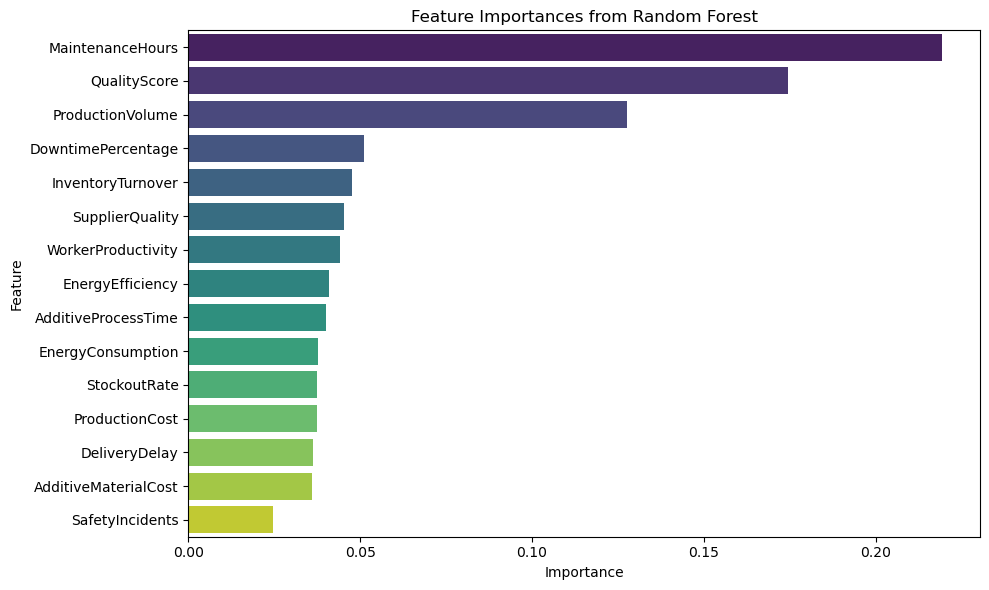

In [66]:
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()


In [67]:
defect_df["Predicted_Defect"] = rfc.predict(defect_df[feature_names])
defect_df.to_csv('C:/Users/gadda/Downloads/defect_with_predictions.csv', index=False)

In [68]:
print(feature_df['Importance'].to_string(index=False))

0.219389
0.174541
0.127490
0.051157
0.047568
0.045386
0.044001
0.040974
0.040066
0.037692
0.037417
0.037400
0.036349
0.035988
0.024580
